<a href="https://colab.research.google.com/github/MonishSoundarRaj/data_check_generator/blob/main/Heatmaps_all_models.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
!ls

'all data'			 synthetic_data_cg_bw.csv	   synthetic_data_tvae_bw.csv
 blue_waters_data_training.csv	 synthetic_data_cg_helios.csv	   synthetic_data_tvae_helios.csv
 bw_syn_findiff.csv		 synthetic_data_cg_philly.csv	   synthetic_data_tvae_philly.csv
 helios_data_training.csv	 synthetic_data_cg_theta.csv	   synthetic_data_tvae_theta.csv
 helios_syn_findiff.csv		 synthetic_data_ctgan_bw.csv	   theta_data_training.csv
 philly_data_training.csv	 synthetic_data_ctgan_helios.csv   theta_syn_findiff.csv
 philly_syn_findiff.csv		 synthetic_data_ctgan_philly.csv
 sample_data			 synthetic_data_ctgan_theta.csv


In [3]:
# Load Data
import pandas as pd

# Original training data
blue_waters_data_training = pd.read_csv("blue_waters_data_training.csv")
helios_data_training = pd.read_csv("helios_data_training.csv")
philly_data_training = pd.read_csv("philly_data_training.csv")
theta_data_training = pd.read_csv("theta_data_training.csv")

# Synthetic data - CG (Conditional GAN)
synthetic_data_cg_bw = pd.read_csv("synthetic_data_cg_bw.csv")
synthetic_data_cg_helios = pd.read_csv("synthetic_data_cg_helios.csv")
synthetic_data_cg_philly = pd.read_csv("synthetic_data_cg_philly.csv")
synthetic_data_cg_theta = pd.read_csv("synthetic_data_cg_theta.csv")

# Synthetic data - CTGAN
synthetic_data_ctgan_bw = pd.read_csv("synthetic_data_ctgan_bw.csv")
synthetic_data_ctgan_helios = pd.read_csv("synthetic_data_ctgan_helios.csv")
synthetic_data_ctgan_philly = pd.read_csv("synthetic_data_ctgan_philly.csv")
synthetic_data_ctgan_theta = pd.read_csv("synthetic_data_ctgan_theta.csv")

# Synthetic data - TVAE (Tabular Variational Autoencoder)
synthetic_data_tvae_bw = pd.read_csv("synthetic_data_tvae_bw.csv")
synthetic_data_tvae_helios = pd.read_csv("synthetic_data_tvae_helios.csv")
synthetic_data_tvae_philly = pd.read_csv("synthetic_data_tvae_philly.csv")
synthetic_data_tvae_theta = pd.read_csv("synthetic_data_tvae_theta.csv")

# # Synthetic data - FinDiff
df_syn_philly_findiff = pd.read_csv('philly_syn_findiff.csv')
df_syn_bw_findiff = pd.read_csv('bw_syn_findiff.csv')
df_syn_helios_findiff = pd.read_csv('helios_syn_findiff.csv')
df_syn_theta_findiff = pd.read_csv('theta_syn_findiff.csv')

In [4]:
# Renaming columns to match the specified structure
df_syn_philly_findiff.columns = ['u_id', 'user', 'gpu_num', 'cpu_num', 'node_num', 'interval', 'run_time', 'wall_time']
df_syn_bw_findiff.columns = ['u_id', 'user', 'gpu_num', 'cpu_num', 'node_num', 'interval', 'run_time', 'wall_time']
df_syn_helios_findiff.columns = ['u_id', 'user', 'gpu_num', 'cpu_num', 'node_num', 'interval', 'run_time', 'wall_time']
df_syn_theta_findiff.columns = ['u_id', 'user', 'gpu_num', 'cpu_num', 'node_num', 'interval', 'run_time', 'wall_time']

# Converting data types for 'u_id' and 'user' columns
df_syn_philly_findiff['u_id'] = df_syn_philly_findiff['u_id'].astype(int)
df_syn_philly_findiff['user'] = df_syn_philly_findiff['user'].astype(int)
df_syn_bw_findiff['u_id'] = df_syn_bw_findiff['u_id'].astype(int)
df_syn_bw_findiff['user'] = df_syn_bw_findiff['user'].astype(int)
df_syn_helios_findiff['u_id'] = df_syn_helios_findiff['u_id'].astype(int)
df_syn_helios_findiff['user'] = df_syn_helios_findiff['user'].astype(int)
df_syn_theta_findiff['u_id'] = df_syn_theta_findiff['u_id'].astype(int)
df_syn_theta_findiff['user'] = df_syn_theta_findiff['user'].astype(int)

In [5]:
helios_data_training = helios_data_training.drop(columns=['wall_time'])
synthetic_data_cg_helios = synthetic_data_cg_helios.drop(columns=['wall_time'])
synthetic_data_ctgan_helios = synthetic_data_ctgan_helios.drop(columns=['wall_time'])
synthetic_data_tvae_helios = synthetic_data_tvae_helios.drop(columns=['wall_time'])
df_syn_helios_findiff = df_syn_helios_findiff.drop(columns=['wall_time'])

In [6]:
theta_data_training = theta_data_training.drop(columns=['gpu_num'], errors='ignore')
synthetic_data_cg_theta = synthetic_data_cg_theta.drop(columns=['gpu_num'], errors='ignore')
synthetic_data_ctgan_theta = synthetic_data_ctgan_theta.drop(columns=['gpu_num'], errors='ignore')
synthetic_data_tvae_theta = synthetic_data_tvae_theta.drop(columns=['gpu_num'], errors='ignore')
df_syn_theta_findiff = df_syn_theta_findiff.drop(columns=['gpu_num'], errors='ignore')

In [7]:
philly_data_training = philly_data_training.drop(columns=['wall_time', 'cpu_num'], errors='ignore')
synthetic_data_cg_philly = synthetic_data_cg_philly.drop(columns=['wall_time', 'cpu_num'], errors='ignore')
synthetic_data_ctgan_philly = synthetic_data_ctgan_philly.drop(columns=['wall_time', 'cpu_num'], errors='ignore')
synthetic_data_tvae_philly = synthetic_data_tvae_philly.drop(columns=['wall_time', 'cpu_num'], errors='ignore')
df_syn_philly_findiff = df_syn_philly_findiff.drop(columns=['wall_time', 'cpu_num'], errors='ignore')

# Real Data

<ipython-input-8-81e810981813>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix_bw = blue_waters_data_training.corr()


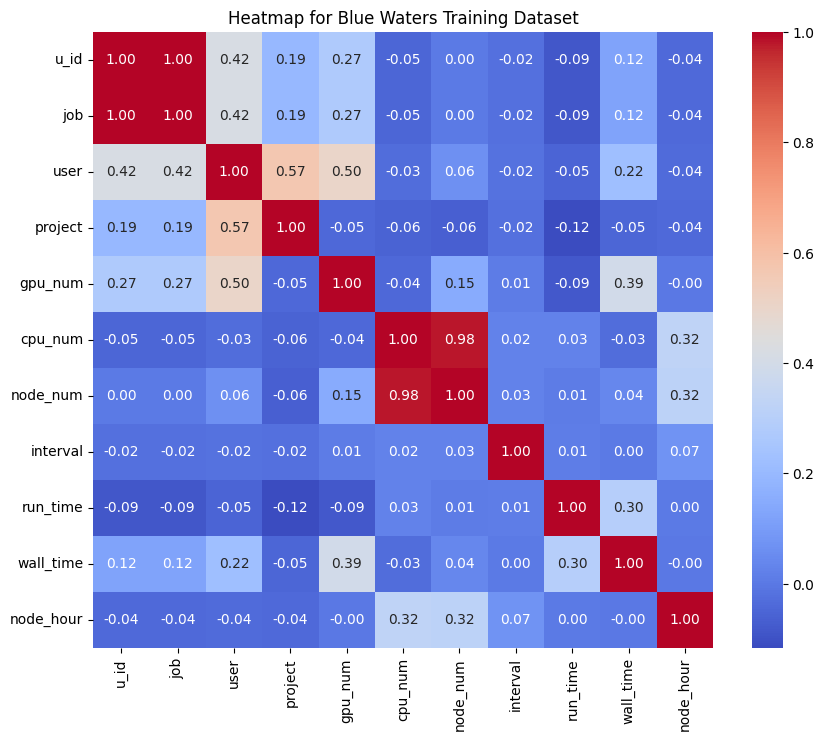

In [8]:
corr_matrix_bw = blue_waters_data_training.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix_bw, annot=True, fmt=".2f", cmap="coolwarm")
plt.title("Heatmap for Blue Waters Training Dataset")
plt.show()

<ipython-input-9-fc61dd26446e>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix_theta = theta_data_training.corr()


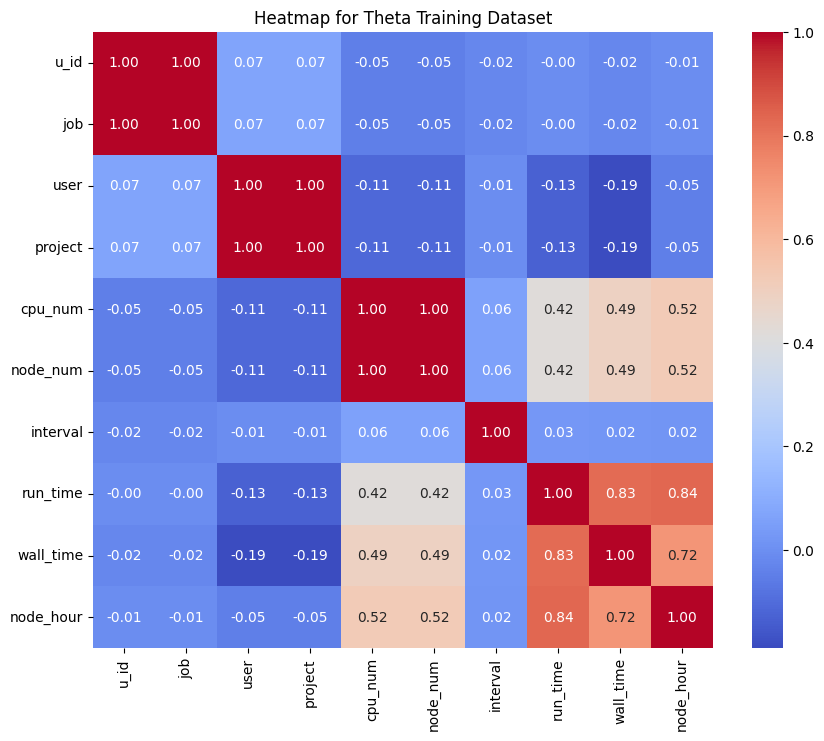

In [9]:
corr_matrix_theta = theta_data_training.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix_theta, annot=True, fmt=".2f", cmap="coolwarm")
plt.title("Heatmap for Theta Training Dataset")
plt.show()

<ipython-input-10-96f739ab9a19>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix_philly = philly_data_training.corr()


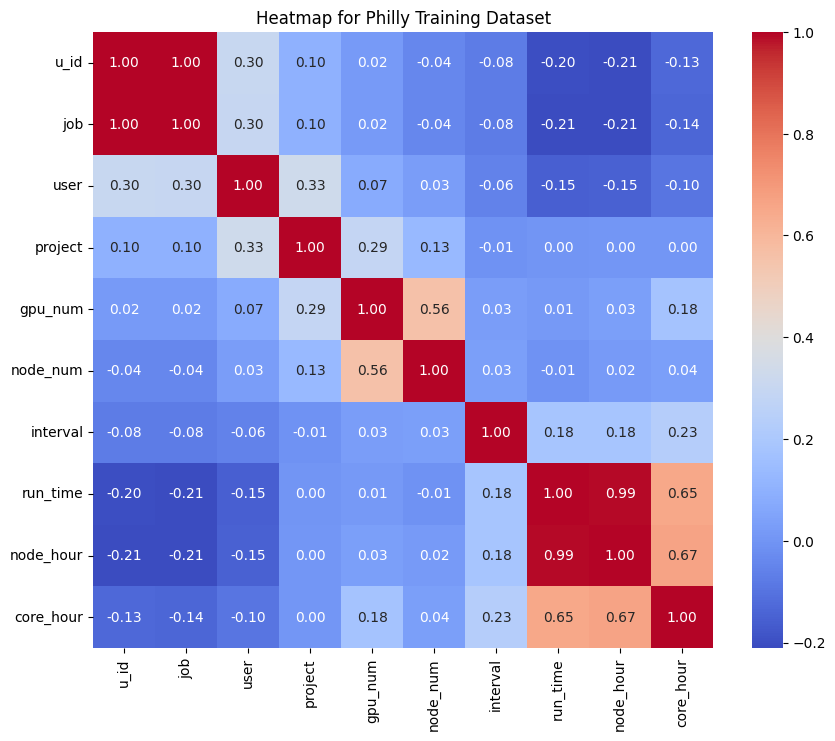

In [10]:
corr_matrix_philly = philly_data_training.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix_philly, annot=True, fmt=".2f", cmap="coolwarm")
plt.title("Heatmap for Philly Training Dataset")
plt.show()


<ipython-input-11-dde6365eeb12>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix_helios = helios_data_training.corr()


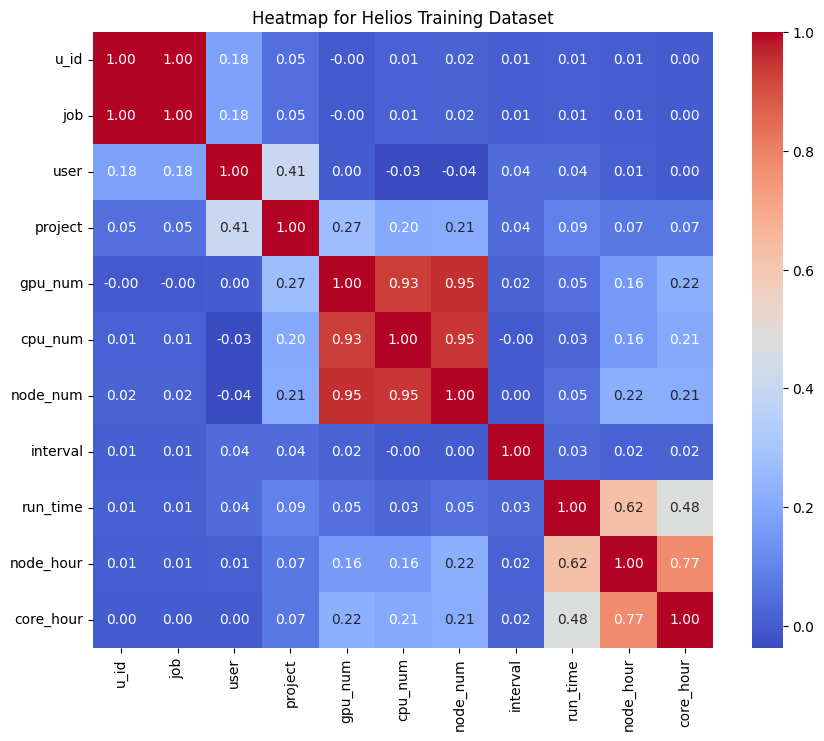

In [11]:
corr_matrix_helios = helios_data_training.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix_helios, annot=True, fmt=".2f", cmap="coolwarm")
plt.title("Heatmap for Helios Training Dataset")
plt.show()


# CTGAN

<ipython-input-12-d010becc4cbc>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix_ctgan_bw = synthetic_data_ctgan_bw.corr()


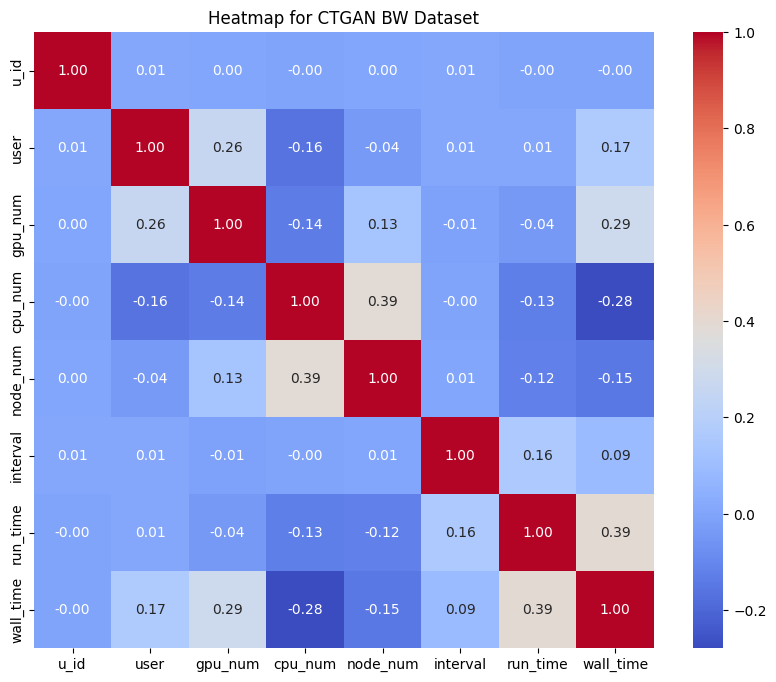

In [12]:
# CTGAN BW Heatmap
corr_matrix_ctgan_bw = synthetic_data_ctgan_bw.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix_ctgan_bw, annot=True, fmt=".2f", cmap="coolwarm")
plt.title("Heatmap for CTGAN BW Dataset")
plt.show()

<ipython-input-13-7b829b85c3ca>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix_ctgan_theta = synthetic_data_ctgan_theta.corr()


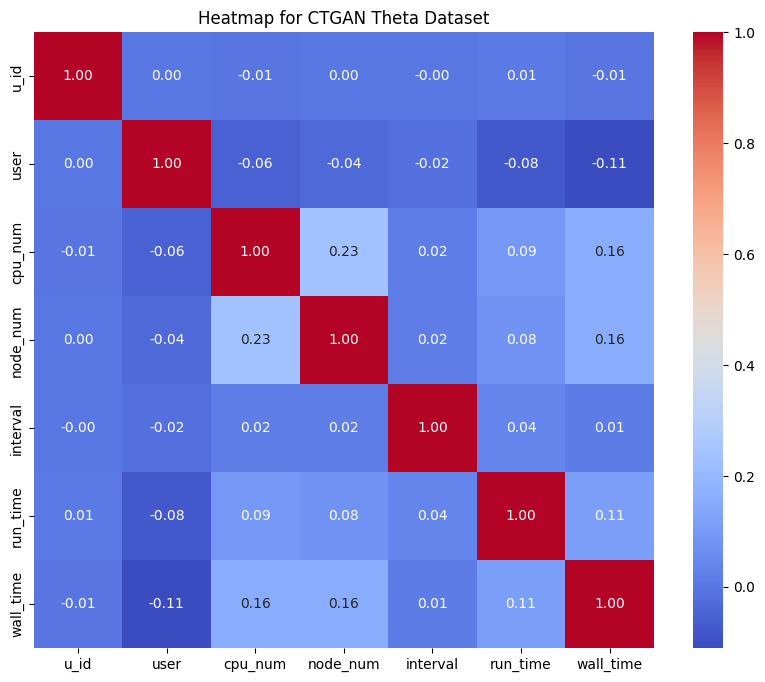

In [13]:
# CTGAN Theta Heatmap
corr_matrix_ctgan_theta = synthetic_data_ctgan_theta.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix_ctgan_theta, annot=True, fmt=".2f", cmap="coolwarm")
plt.title("Heatmap for CTGAN Theta Dataset")
plt.show()

<ipython-input-14-ebc3378ebb7e>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix_ctgan_philly = synthetic_data_ctgan_philly.corr()


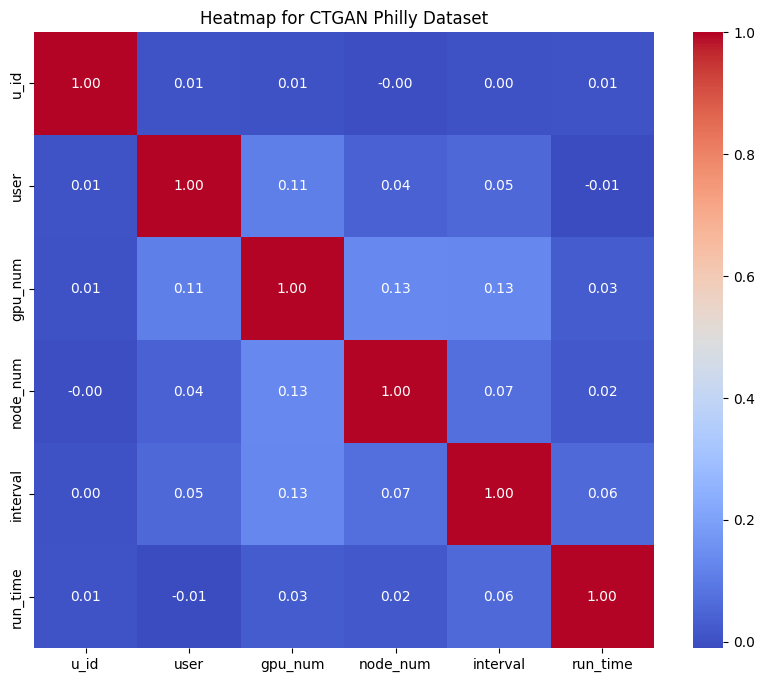

In [14]:
# CTGAN Philly Heatmap
corr_matrix_ctgan_philly = synthetic_data_ctgan_philly.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix_ctgan_philly, annot=True, fmt=".2f", cmap="coolwarm")
plt.title("Heatmap for CTGAN Philly Dataset")
plt.show()

<ipython-input-15-8084364ff2cd>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix_ctgan_helios = synthetic_data_ctgan_helios.corr()


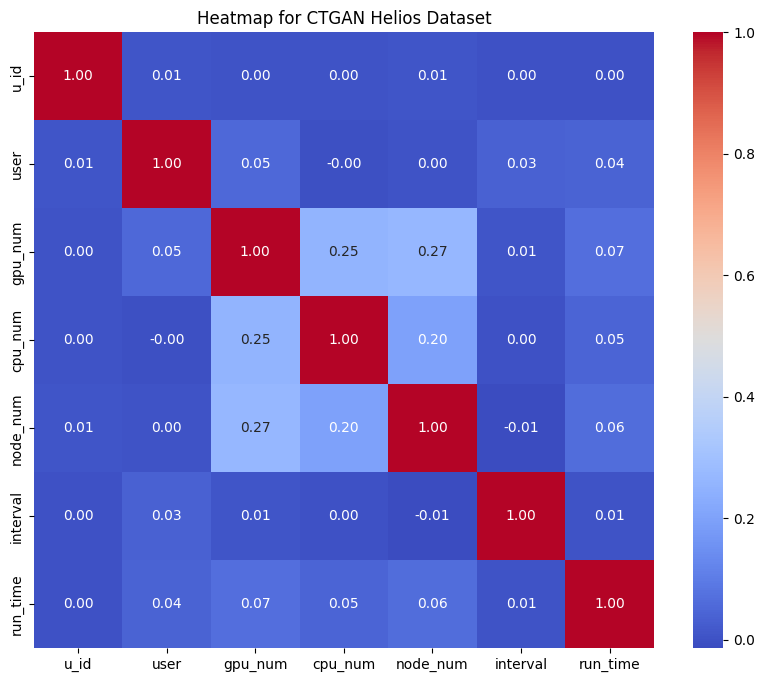

In [15]:
# CTGAN Helios Heatmap
corr_matrix_ctgan_helios = synthetic_data_ctgan_helios.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix_ctgan_helios, annot=True, fmt=".2f", cmap="coolwarm")
plt.title("Heatmap for CTGAN Helios Dataset")
plt.show()

# TVAE

<ipython-input-16-49d6beffbb2d>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix_tvae_bw = synthetic_data_tvae_bw.corr()


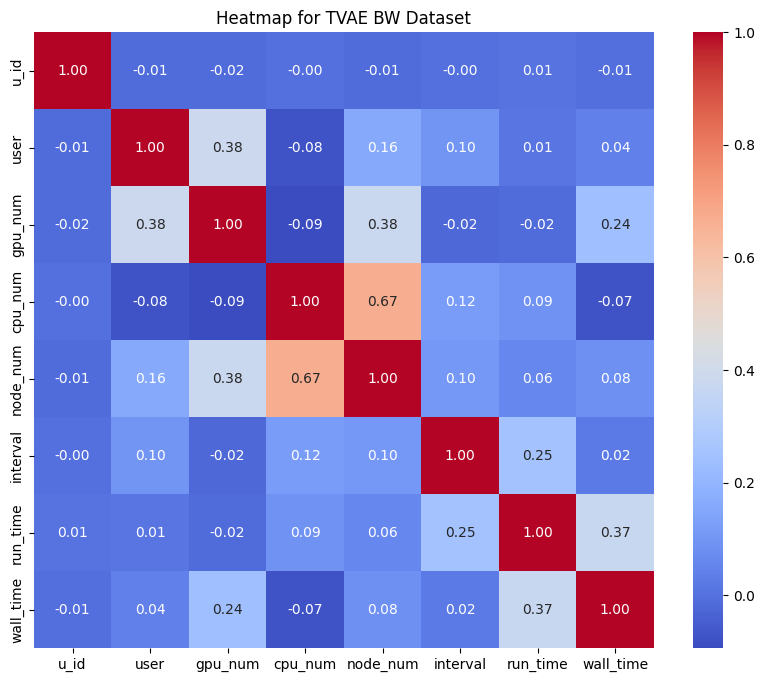

In [16]:
# TVAE BW Heatmap
corr_matrix_tvae_bw = synthetic_data_tvae_bw.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix_tvae_bw, annot=True, fmt=".2f", cmap="coolwarm")
plt.title("Heatmap for TVAE BW Dataset")
plt.show()

<ipython-input-17-16a21209ffff>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix_tvae_theta = synthetic_data_tvae_theta.corr()


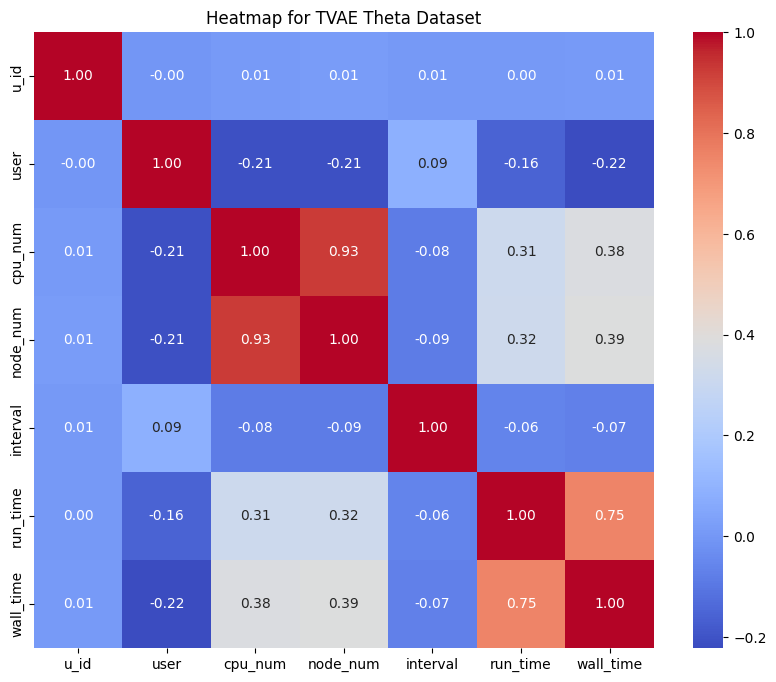

In [17]:
# TVAE Theta Heatmap
corr_matrix_tvae_theta = synthetic_data_tvae_theta.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix_tvae_theta, annot=True, fmt=".2f", cmap="coolwarm")
plt.title("Heatmap for TVAE Theta Dataset")
plt.show()

<ipython-input-18-c4eb5d63d0cb>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix_tvae_philly = synthetic_data_tvae_philly.corr()


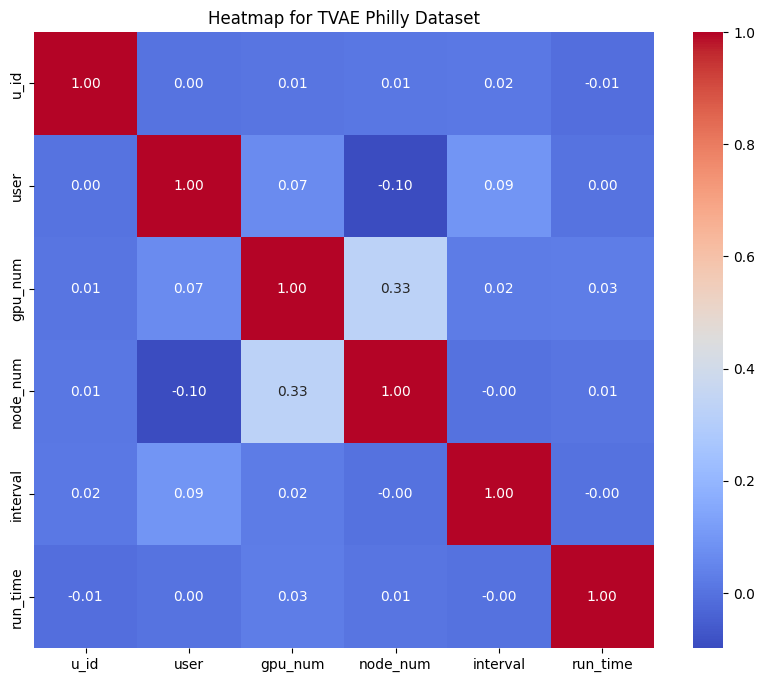

In [18]:
# TVAE Philly Heatmap
corr_matrix_tvae_philly = synthetic_data_tvae_philly.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix_tvae_philly, annot=True, fmt=".2f", cmap="coolwarm")
plt.title("Heatmap for TVAE Philly Dataset")
plt.show()

<ipython-input-19-2ee6fe061a7f>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix_tvae_helios = synthetic_data_tvae_helios.corr()


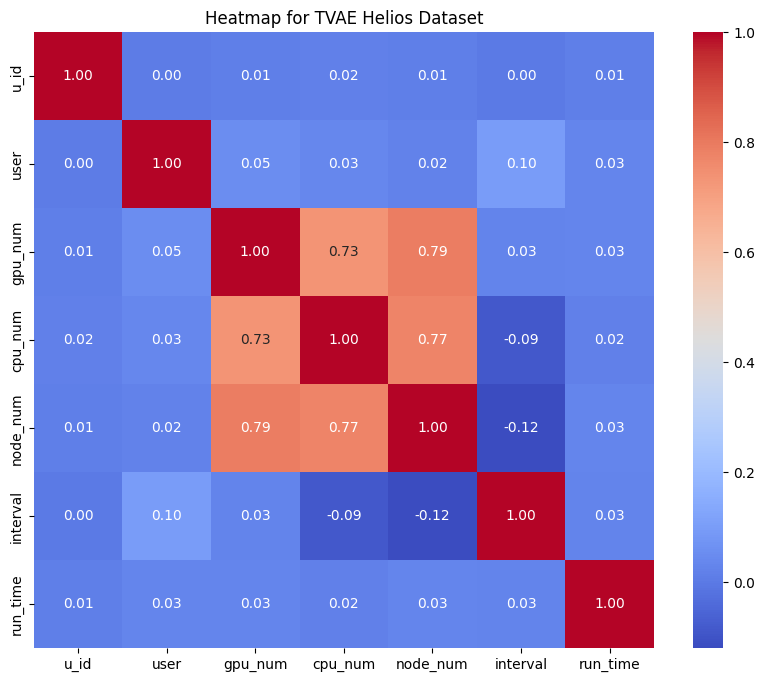

In [19]:
# TVAE Helios Heatmap
corr_matrix_tvae_helios = synthetic_data_tvae_helios.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix_tvae_helios, annot=True, fmt=".2f", cmap="coolwarm")
plt.title("Heatmap for TVAE Helios Dataset")
plt.show()

# Copula GAN

<ipython-input-20-11b0e1b9b848>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix_cg_bw = synthetic_data_cg_bw.corr()


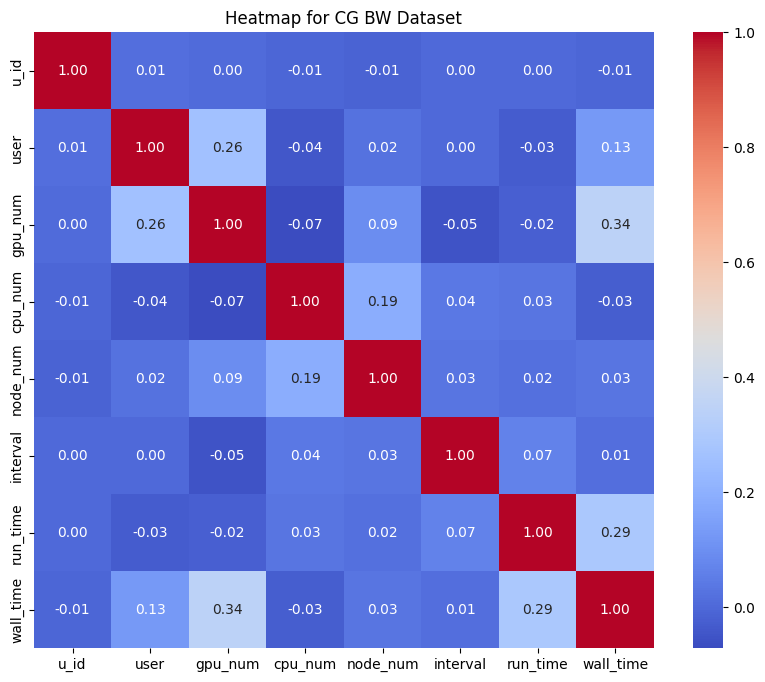

In [20]:
# CG BW Heatmap
corr_matrix_cg_bw = synthetic_data_cg_bw.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix_cg_bw, annot=True, fmt=".2f", cmap="coolwarm")
plt.title("Heatmap for CG BW Dataset")
plt.show()

<ipython-input-21-a0c9a571094a>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix_cg_theta = synthetic_data_cg_theta.corr()


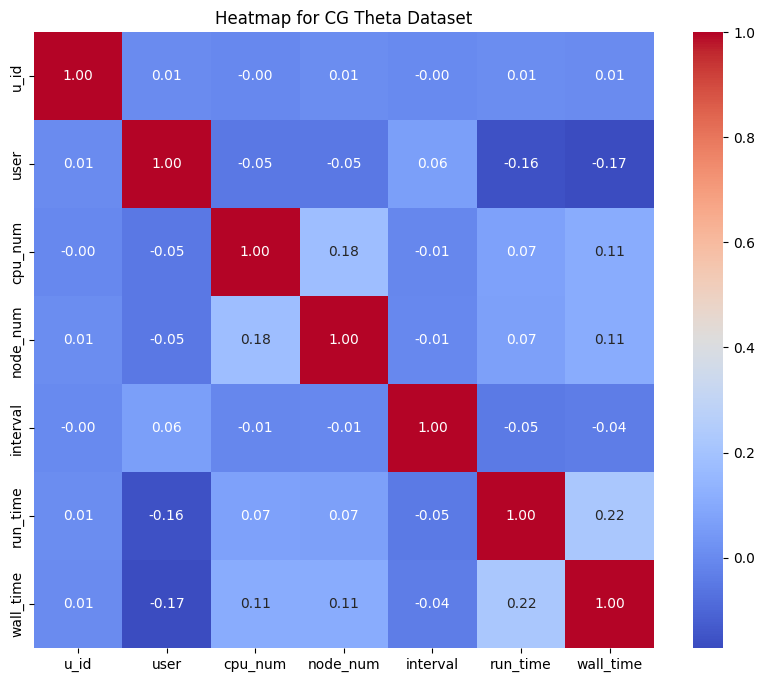

In [21]:
# CG Theta Heatmap
corr_matrix_cg_theta = synthetic_data_cg_theta.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix_cg_theta, annot=True, fmt=".2f", cmap="coolwarm")
plt.title("Heatmap for CG Theta Dataset")
plt.show()

<ipython-input-22-cef06f253403>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix_cg_philly = synthetic_data_cg_philly.corr()


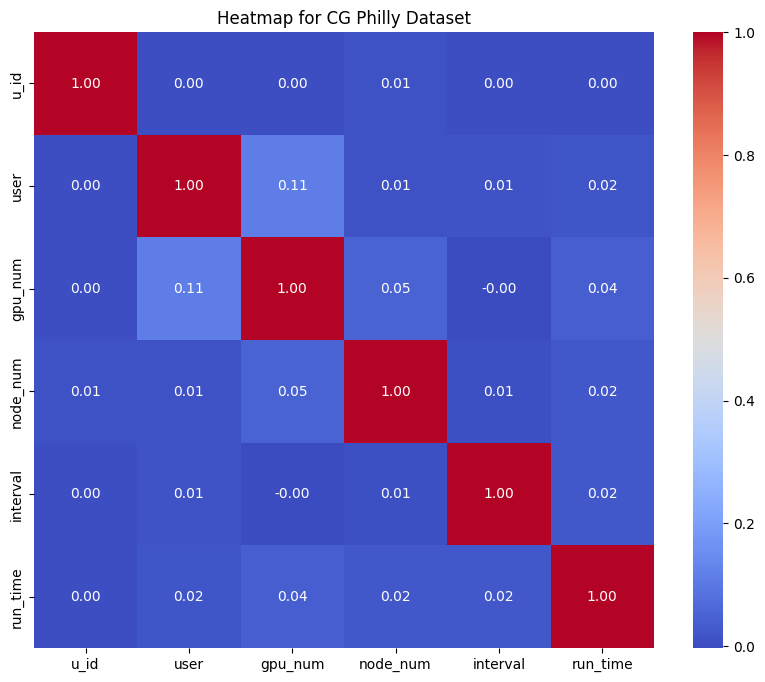

In [22]:
# CG Philly Heatmap
corr_matrix_cg_philly = synthetic_data_cg_philly.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix_cg_philly, annot=True, fmt=".2f", cmap="coolwarm")
plt.title("Heatmap for CG Philly Dataset")
plt.show()

<ipython-input-23-472b9414118c>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix_cg_helios = synthetic_data_cg_helios.corr()


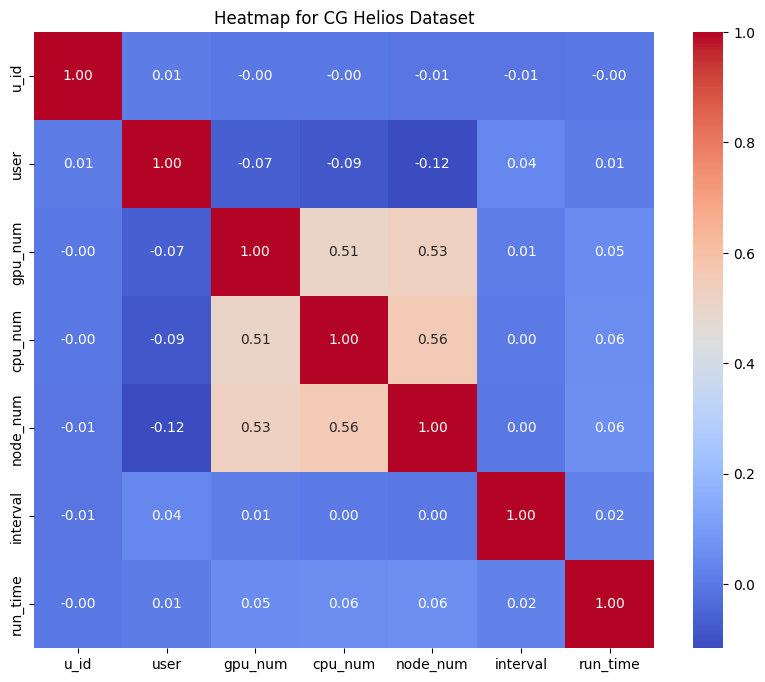

In [23]:
# CG Helios Heatmap
corr_matrix_cg_helios = synthetic_data_cg_helios.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix_cg_helios, annot=True, fmt=".2f", cmap="coolwarm")
plt.title("Heatmap for CG Helios Dataset")
plt.show()

# FinDiff

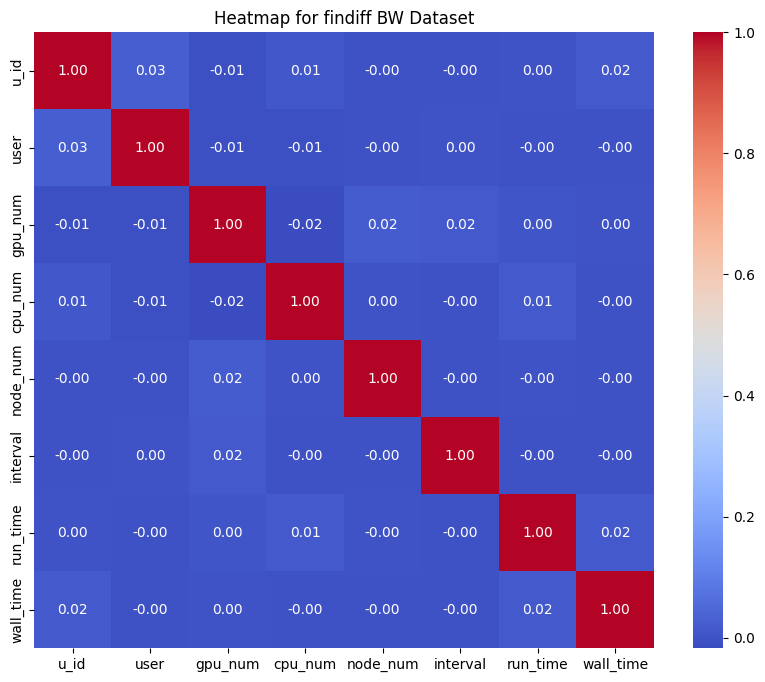

In [24]:
# findiff BW Heatmap
corr_matrix_syn_bw_findiff = df_syn_bw_findiff.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix_syn_bw_findiff, annot=True, fmt=".2f", cmap="coolwarm")
plt.title("Heatmap for findiff BW Dataset")
plt.show()

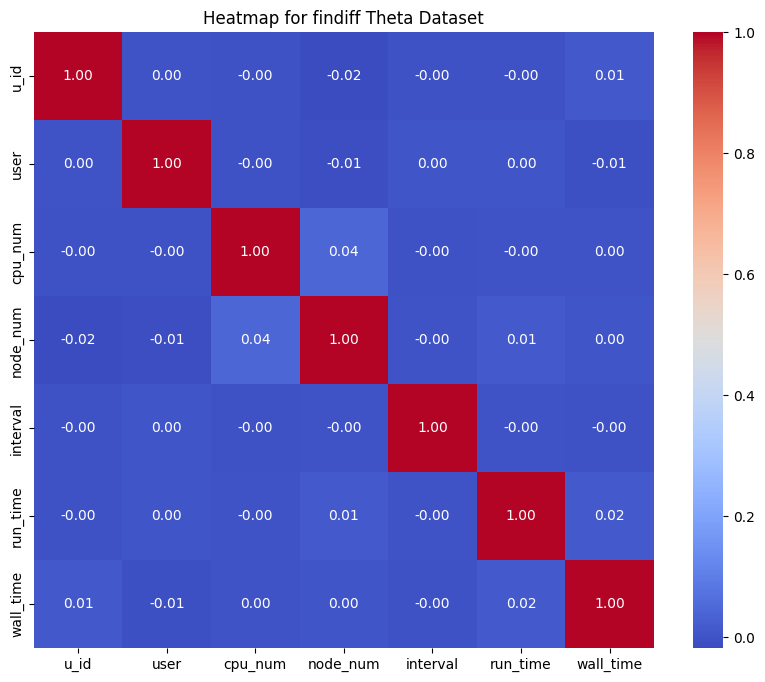

In [25]:
# findiff Theta Heatmap
corr_matrix_syn_theta_findiff = df_syn_theta_findiff.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix_syn_theta_findiff, annot=True, fmt=".2f", cmap="coolwarm")
plt.title("Heatmap for findiff Theta Dataset")
plt.show()

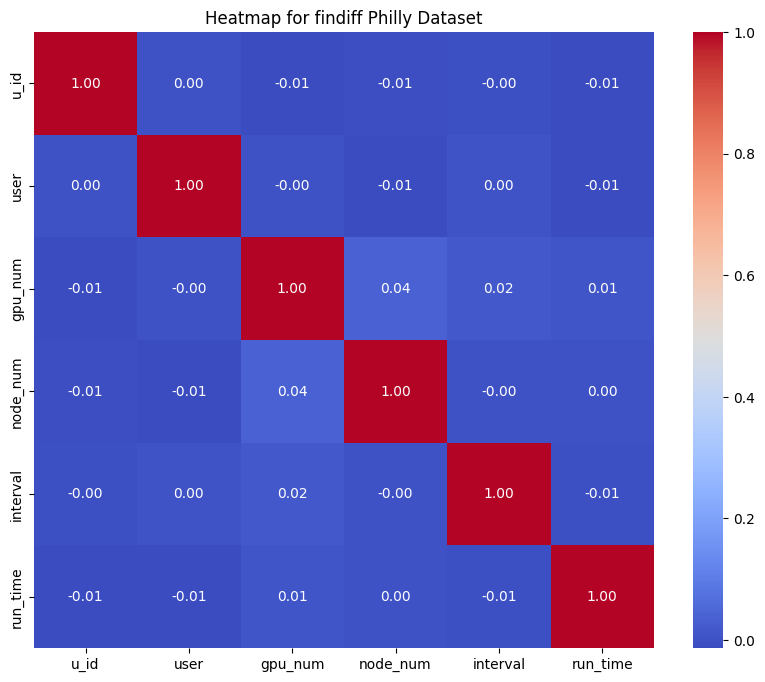

In [26]:
# findiff Philly Heatmap
corr_matrix_syn_philly_findiff = df_syn_philly_findiff.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix_syn_philly_findiff, annot=True, fmt=".2f", cmap="coolwarm")
plt.title("Heatmap for findiff Philly Dataset")
plt.show()

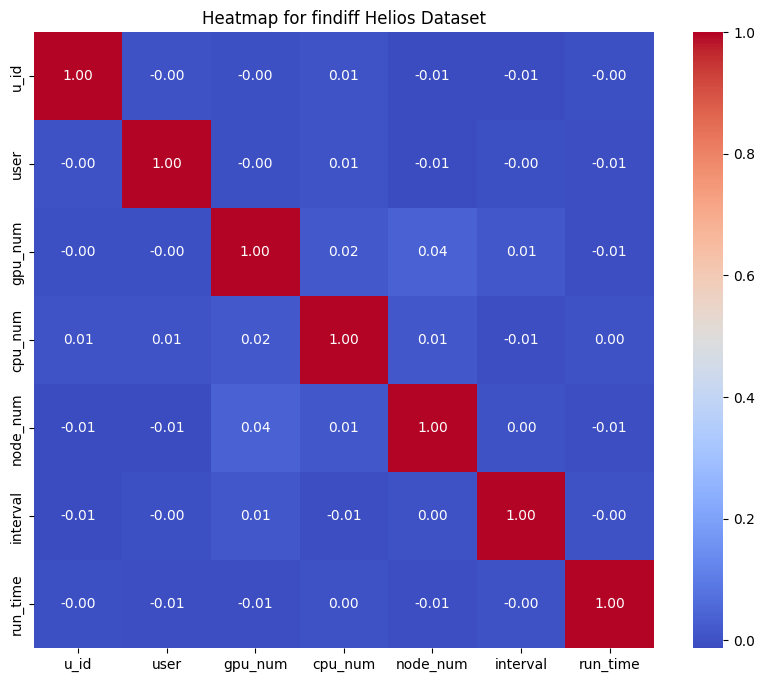

In [27]:
# findiff Helios Heatmap
corr_matrix_syn_helios_findiff = df_syn_helios_findiff.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix_syn_helios_findiff, annot=True, fmt=".2f", cmap="coolwarm")
plt.title("Heatmap for findiff Helios Dataset")
plt.show()